In [1]:
# libraries
%load_ext autoreload
%autoreload 2

import numpy as np
import soundfile as sf
import sounddevice as sd
import matplotlib.pyplot as plt
import sys
%matplotlib inline

from PDM2PCM import *
from PCM2PDM import *
from Serialize import *
from PlotSuite import *
from PyChronux import *

In [19]:
fname = "REC3.WAV"
wd = r"C:/Users/levyg/Documents/MEGA/Repositories/mems2sd_esp32/python/PDMSignalProcessing/"
fs_pcm = 312500
os = 16
data_pcm, _ = sf.read( 
                        wd+fname, 
                        channels=1, 
                        samplerate=int(fs_pcm), 
                        format='RAW', 
                        endian='LITTLE', 
                        subtype='PCM_16', 
                        dtype=np.int16
                    )
# data_pcm = data_pcm[int(2e5):int(2e5+2**16)]

In [12]:
len(data_pcm)

845890

In [20]:
data_pcm = data_pcm[-200000:]

SNR_1 = 57.163776, SNR_2 = 54.694495, SNR_3 = 54.694495


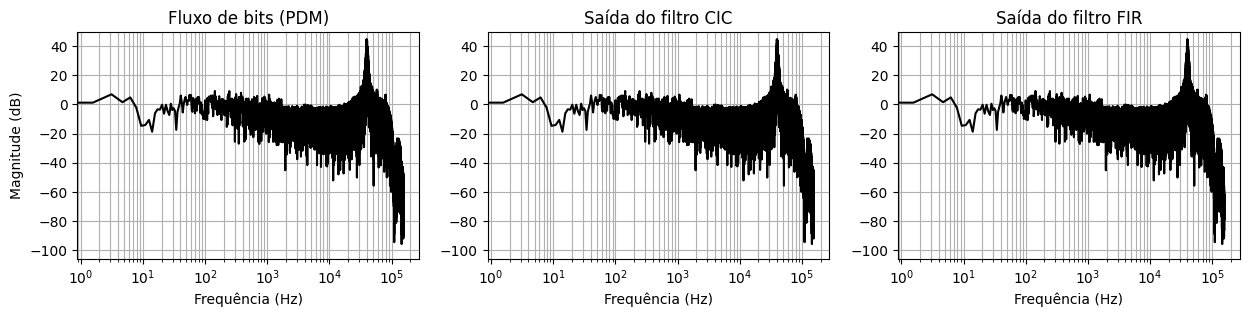

In [21]:
pdm_cic_fir_plot(data_pcm, data_pcm, data_pcm, fs_pcm, 1, lang='pt')

In [22]:
params = Params(tapers = [7, 11], Fs=fs_pcm, pad=0, fpass=[0, fs_pcm/2], trialave=0, err=[0, 0.05])
movingwin = [0.1, 0.01]
S, t, f = mtspecgramc(data_pcm.ravel(), movingwin, params)
S[:] = (S-np.min(S))/(np.max(S)-np.min(S))

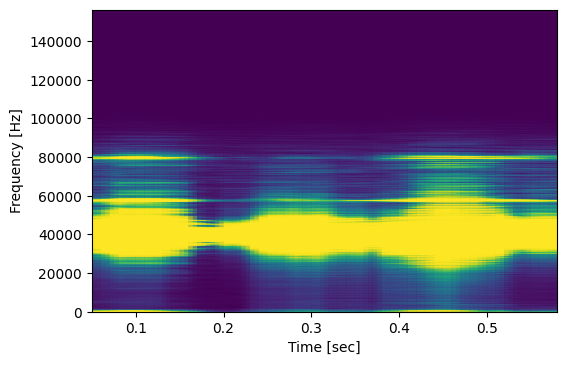

In [26]:
chunked_pcolormesh(t, f, S, v=[0, 0.1e-3])